In [650]:
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.spatial import distance

# Uniform Distribution

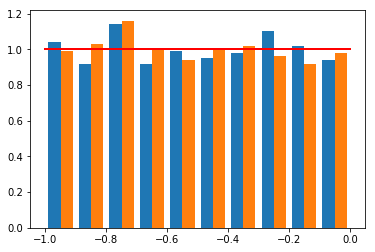

In [377]:
ns=1000;fea=2
s = np.random.uniform(low=-1,high=0,size=(ns,fea))
count, bins, ignored = plt.hist(s, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [378]:
n=400
u1=pd.DataFrame(np.random.uniform(low=-1,high=1,size=(n,5)))
y1=pd.DataFrame([0]*n,columns=['labels'])
s1=pd.concat([u1,y1],axis=1)
u2=pd.DataFrame(np.random.uniform(low=2,high=3,size=(n,5)))
y2=pd.DataFrame([1]*n,columns=['labels'])
s2=pd.concat([u2,y2],axis=1)
u3=pd.DataFrame(np.random.uniform(low=5,high=7,size=(n,5)))
y3=pd.DataFrame([2]*n,columns=['labels'])
s3=pd.concat([u3,y3],axis=1)
u4=pd.DataFrame(np.random.uniform(low=8,high=10,size=(n,5)))
y4=pd.DataFrame([3]*n,columns=['labels'])
s4=pd.concat([u4,y4],axis=1)
u5=pd.DataFrame(np.random.uniform(low=-3,high=-5,size=(n,5)))
y5=pd.DataFrame([4]*n,columns=['labels'])
s5=pd.concat([u5,y5],axis=1)
S=pd.concat([s1,s2,s3,s4,s5],axis=0)
S.head()

,0,1,2,3,4,labels
0,-0.367537,-0.050820,-0.461975,-0.419700,0.087380,0
1,-0.128918,0.809981,0.623213,0.930243,-0.125518,0
2,0.126817,-0.950485,-0.784588,-0.695762,0.471555,0
3,0.021886,-0.755593,0.594198,-0.083241,-0.769306,0
4,-0.150336,0.690291,0.503606,-0.595180,0.507828,0


In [379]:
X=S.iloc[:,0:5]
Y=S.iloc[:,-1]

In [380]:
# s = np.random.uniform(-1,0,1000)
# count, bins, ignored = plt.hist(s, 15, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
# plt.show()

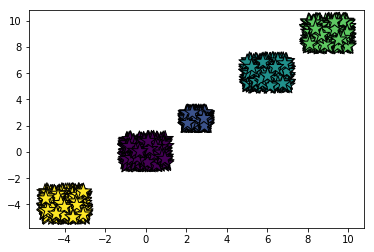

In [381]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='*', c=Y,
            s=300, edgecolor='k',)

# Feature distribution visualization

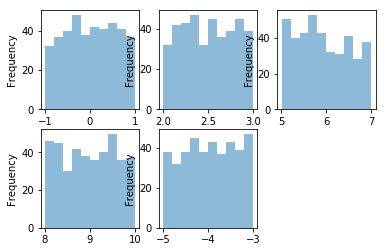

In [382]:
for i in range(0,5):
    k=i+1
    #print i,k
    c1=S.iloc[400*i:400*k,2]
    #print c1
    plt.subplot(2,3,k)
    c1.plot.hist(alpha=0.5)

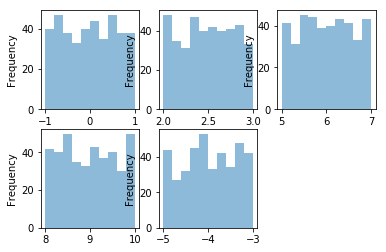

In [383]:
for i in range(0,5):
    k=i+1
    #print i,k
    c1=S.iloc[400*i:400*k,0]
    #print c1
    plt.subplot(2,3,k)
    c1.plot.hist(alpha=0.5)

In [384]:
# A=All.sort_values(by='labels')
# B=A.iloc[0:400,0]
# # c1=A.iloc[400:800,2]
# # type(c1)
# B.plot.hist(alpha=0.5)
# B.head()

# Compute the covariance matrix

In [395]:
X_std = X
#X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
           0          1          2          3          4
0  20.779868  20.496661  20.413029  20.510384  20.554916
1  20.496661  20.776669  20.405378  20.519219  20.567037
2  20.413029  20.405378  20.597968  20.421323  20.476993
3  20.510384  20.519219  20.421323  20.819218  20.586268
4  20.554916  20.567037  20.476993  20.586268  20.899393


# Find the Eigen vectors and values after standarizing

In [396]:
cov_matd = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matd)
print('Covariance matrix \n%s' %cov_matd)
print('\nEigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[20.7798679  20.49666115 20.41302864 20.51038396 20.55491631]
 [20.49666115 20.77666917 20.40537833 20.51921901 20.5670372 ]
 [20.41302864 20.40537833 20.5979681  20.42132291 20.47699281]
 [20.51038396 20.51921901 20.42132291 20.81921763 20.58626818]
 [20.55491631 20.5670372  20.47699281 20.58626818 20.89939257]]

Eigenvectors 
[[-0.44721096 -0.63045731  0.29025707  0.54408857  0.14914559]
 [-0.44725542  0.20725162 -0.3027016   0.2471099  -0.7773788 ]
 [-0.4452903  -0.4043039  -0.49293372 -0.61152943  0.1459555 ]
 [-0.44765457  0.57997297 -0.22667146  0.26476322  0.58460006]
 [-0.44865007  0.2444178   0.72784543 -0.44591089 -0.1018703 ]]

Eigenvalues 
[102.75571713   0.29576094   0.26371326   0.28043784   0.2774862 ]


# Eigendecomposition from Correlation matrix

In [397]:
cor_mat1 = np.corrcoef(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.44715473 -0.60136126  0.25555083  0.57826121  0.19678673]
 [-0.44723312  0.2300826  -0.31728362  0.28897176 -0.75024727]
 [-0.44720617 -0.44113658 -0.44539262 -0.63348734  0.07565957]
 [-0.44717198  0.58064498 -0.25005584  0.16025475  0.61211038]
 [-0.44730197  0.231682    0.75704846 -0.39385467 -0.13416603]]

Eigenvalues 
[4.94621083 0.0142418  0.01267399 0.0135274  0.01334598]


In [405]:
eig_vecs[0]

array([-0.44715473, -0.60136126,  0.25555083,  0.57826121,  0.19678673])

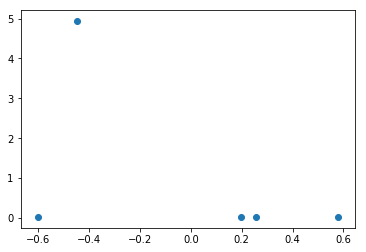

In [417]:
a=np.cov(X.iloc[:,0],X.iloc[:,3])
# plt.plot(,eig_vals)
plt.scatter(eig_vecs[0],eig_vals)

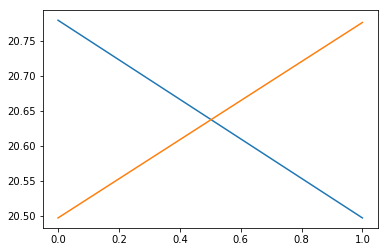

In [418]:
a=np.cov(X.iloc[:,0],X.iloc[:,1])
plt.plot(a)

# Eigendecomposition from raw data

In [419]:
cor_mat2 = np.corrcoef(X.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.44715473 -0.60136126  0.25555083  0.57826121  0.19678673]
 [-0.44723312  0.2300826  -0.31728362  0.28897176 -0.75024727]
 [-0.44720617 -0.44113658 -0.44539262 -0.63348734  0.07565957]
 [-0.44717198  0.58064498 -0.25005584  0.16025475  0.61211038]
 [-0.44730197  0.231682    0.75704846 -0.39385467 -0.13416603]]

Eigenvalues 
[4.94621083 0.0142418  0.01267399 0.0135274  0.01334598]


# SVD on the covariance matrix

In [420]:
uc,sc,vc = np.linalg.svd(cov_matd)
print 'The Eigen vector :\n',uc,'\n\n', 'The singular value decomposition: \n',sc, '\n\n','The singular value decomposition: \n',vc

The Eigen vector :
[[-0.44721096  0.63045731 -0.54408857  0.14914559 -0.29025707]
 [-0.44725542 -0.20725162 -0.2471099  -0.7773788   0.3027016 ]
 [-0.4452903   0.4043039   0.61152943  0.1459555   0.49293372]
 [-0.44765457 -0.57997297 -0.26476322  0.58460006  0.22667146]
 [-0.44865007 -0.2444178   0.44591089 -0.1018703  -0.72784543]] 

The singular value decomposition: 
[102.75571713   0.29576094   0.28043784   0.2774862    0.26371326] 

The singular value decomposition: 
[[-0.44721096 -0.44725542 -0.4452903  -0.44765457 -0.44865007]
 [ 0.63045731 -0.20725162  0.4043039  -0.57997297 -0.2444178 ]
 [-0.54408857 -0.2471099   0.61152943 -0.26476322  0.44591089]
 [ 0.14914559 -0.7773788   0.1459555   0.58460006 -0.1018703 ]
 [-0.29025707  0.3027016   0.49293372  0.22667146 -0.72784543]]


# 3.Singular Value decomposition

In [421]:
u,s,v = np.linalg.svd(X_std.T);# A=USV.T, where A=nxm matriix, U=nxn,orthogonal matrix contain eigvect of AA.T, S=Ordered sin.values in dia sqrt of AA.T
#V=mxm orthogonal matrix contain eigen vectors of mxm
print 'The Eigen vector :\n',u,'\n\n', 'The singular value decomposition: \n',s, '\n\n','The singular value decomposition: \n',v

The Eigen vector :
[[-0.44752864  0.62868811 -0.54480224  0.14716824 -0.29325996]
 [-0.44708084 -0.20895542 -0.24794394 -0.77557633  0.30571477]
 [-0.44589551  0.40728317  0.61161782  0.14496775  0.49010775]
 [-0.44743913 -0.57778198 -0.26301788  0.58737288  0.22755419]
 [-0.44812081 -0.24774444  0.44548799 -0.10392459 -0.72701483]] 

The singular value decomposition: 
[527.35281875  24.32387066  23.67695458  23.55261872  22.96407914] 

The singular value decomposition: 
[[ 1.02745232e-03 -1.78685028e-03  1.55120212e-03 ...  1.43703452e-02
   1.62787534e-02  1.67705178e-02]
 [-7.71895063e-03 -2.06733561e-02  1.00297208e-02 ...  1.92475288e-02
   1.95045052e-03 -2.17734748e-03]
 [ 3.36186589e-03 -2.11234224e-03  3.36948259e-03 ... -5.76504032e-03
   1.45010432e-02  3.97115098e-02]
 ...
 [-1.32627728e-02 -9.30946685e-04 -1.44755880e-02 ...  9.98714349e-01
   7.34797762e-04  8.72933559e-04]
 [-1.49988008e-02  4.51525877e-02  1.03207983e-02 ...  7.54464058e-04
   9.96167463e-01 -2.06150347

In [283]:
cov=np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.44720623  0.46351346 -0.28491621 -0.70777601 -0.05511572]
 [ 0.44717704  0.00371648 -0.53118293  0.53618568 -0.47996718]
 [ 0.4472644  -0.71693628  0.33395203 -0.29860332 -0.29200861]
 [ 0.44719163  0.47127803  0.69323039  0.31200257  0.00163445]
 [ 0.44722866 -0.22145169 -0.21112818  0.15826716  0.82542236]]

Eigenvalues 
[4.94883586 0.01286602 0.01382475 0.01365166 0.01332296]


In [284]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [285]:
yn = pd.DataFrame(Y.values, columns=['labels'])

In [286]:
type(principalComponents)
finalDf = pd.concat([principalDf, yn], axis = 1)
finalDf.head(10)
# labels = [0,1,2,3,4]
# print type(finalDf['labels'][6])

,principal component 1,principal component 2,labels
0,1.329698,-0.022421,0
1,1.287860,-0.047583,0
2,1.430519,0.035989,0
3,1.308742,-0.195218,0
4,1.064478,-0.054306,0
5,1.214391,0.143664,0
6,1.340154,-0.065146,0
7,1.465159,-0.059762,0
8,1.587107,0.030696,0
9,1.350743,-0.143189,0


In [288]:
# print type(targets),type(finalDf['labels'])

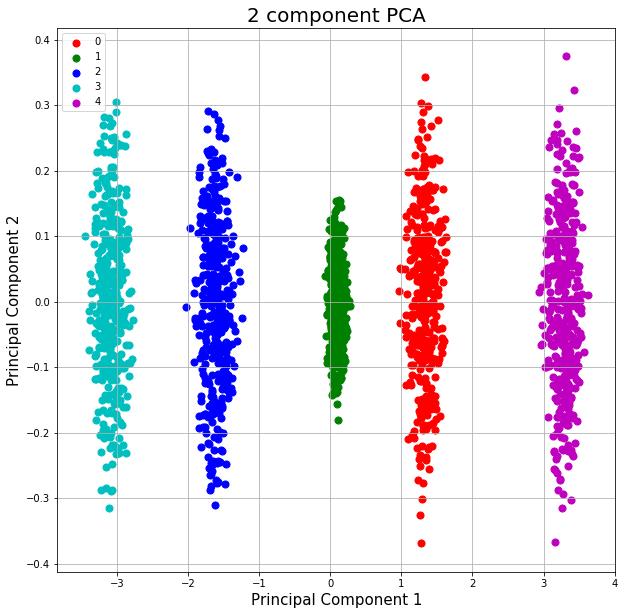

In [478]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
#targets = ['0', '1', '2','3','4'];
labels1 = [0,1,2,3,4]
colors = ['r', 'g', 'b','c','m']
for target, color in zip(labels1,colors):
    indicesToKeep = finalDf['labels'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels1)
ax.grid()

In [ ]:
# Orginal Data represenatation

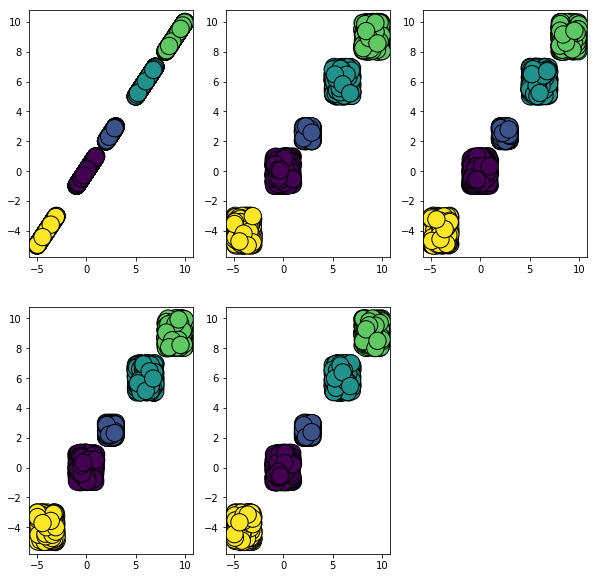

In [468]:
count=0;
fig = plt.figure(figsize = (10, 10))
for i in range(0,5):
    count+=1
    plt.subplot(2,3,count)
    plt.scatter(X.iloc[:,0], X.iloc[:, i], marker='o', c=Y, s=300, edgecolor='k',)

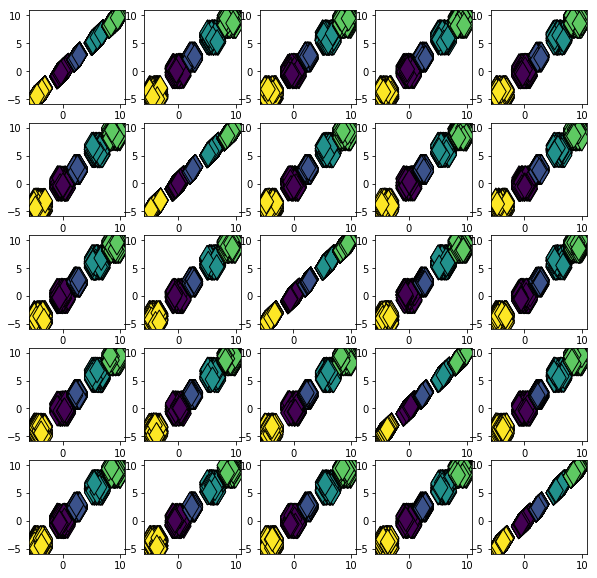

In [476]:
count=0;
fig = plt.figure(figsize = (10, 10))
for j in range(0,5):
    for i in range(0,5):
        count+=1
        plt.subplot(5,5,count)
        plt.scatter(X.iloc[:,j], X.iloc[:, i], marker='d', c=Y, s=300, edgecolor='k',)

# K-means clustering

In [290]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
# kmeans.labels_[90]

In [423]:
kmeans.cluster_centers_
kmeans.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [292]:
pd.crosstab(Y,kmeans.labels_)

col_0,0,1,2,3,4
labels,,,,,
0,0,0,0,400,0
1,400,0,0,0,0
2,0,0,0,0,400
3,0,0,400,0,0
4,0,400,0,0,0


In [293]:
pd.crosstab(Y,kmeans.labels_,normalize='index')

col_0,0,1,2,3,4
labels,,,,,
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


numpy.ndarray

In [698]:
b=[];k=range(1,8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    r= kmeans.labels_
    b.append(r)
dd=pd.DataFrame(b)
d1=dd.T
Y=np.sort(Y)

array([0, 0, 0, ..., 4, 4, 4])

Text(0,0.5,'Accuracy')

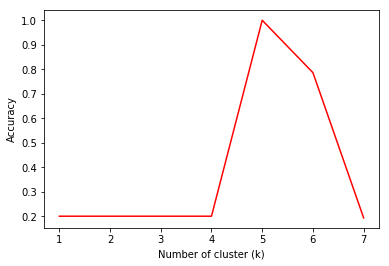

In [699]:
acc=[]
for i in range(0,7):
# #dd=pd.DataFrame(b)
    dd1=d1[i]
    #type(d1)
    pre=dd1.sort_values(ascending=True)
    b=accuracy_score(Y, pre)
    acc.append(b)
plt.plot(k,acc,color='r')
plt.xlabel('Number of cluster (k)')
plt.ylabel('Accuracy')

In [633]:
b=[];k=range(1,8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    r= kmeans.labels_
    b.append(r)
dd=pd.DataFrame(b)
d1=dd.T

# Mahalanobis distance [link](http://kldavenport.com/mahalanobis-distance-and-outliers/)

In [722]:
# Xm=S.iloc[:,0:2]
Xm=S.values[100:200,1:3]
# MD=sqrt((x-m).TC^-1(x-m))


In [371]:
def MahalanobisDist(x, y):
    covariance_xy = np.cov(x,y, rowvar=0)
    inv_covariance_xy = np.linalg.inv(covariance_xy)
    xy_mean = np.mean(x),np.mean(y)
    x_diff = np.array([x_i - xy_mean[0] for x_i in x])
    y_diff = np.array([y_i - xy_mean[1] for y_i in y])
    diff_xy = np.transpose([x_diff, y_diff])
    
    md = []
    for i in range(len(diff_xy)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_xy[i]),inv_covariance_xy),diff_xy[i])))
    return md

In [677]:
md=(MahalanobisDist(finalDf.iloc[:,0],finalDf.iloc[:,1]))


In [674]:
# d=distance.cdist(X.iloc[:], X.iloc[:], 'mahalanobis')
# d.shape

In [690]:
dist = numpy.linalg.norm(a-b

In [700]:
colors = 10*["g","r","c","b","k"]
class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
            #print self.centroids

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                #print featureset.shape
                #distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                #print self.centroids[centroid]
                distances = [distance.cdist(featureset,self.centroids[centroid],'mahalanobis') for centroid in self.centroids]
                #print distances
                distances=np.diag(distances)
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        #distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        distances = [distance.cdist(featureset,self.centroids[centroid],'mahalanobis')for centroid in self.centroids]
        distances=np.diag(distances)
        classification = distances.index(min(distances))
        return classification

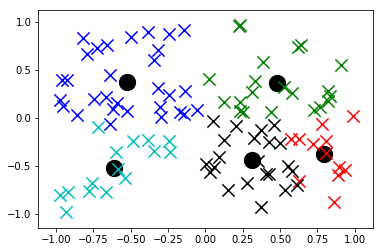

In [724]:
Xm=S.values[100:200,1:3]
clf = K_Means()
clf.fit(Xm)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

In [ ]:
Xm=S.values[100:200,1:3]
clf = K_Means()
clf.fit(Xm)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

In [737]:
Xtotal=S.values[:,2:3]
Xtotal
# print len(Xtotal), len(Y)

array([[-0.46197509],
       [ 0.6232134 ],
       [-0.78458763],
       ...,
       [-3.41603009],
       [-3.89507954],
       [-3.24235061]])

In [743]:
clf = K_Means()
clf.fit(Xtotal)
correct = 0
b=[]
for i in range(len(Xtotal)):
    predict_me = np.array(Xtotal[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    b.append(prediction)

In [750]:
cc=np.asarray(b)
cc.sort()
cc
#print pd.crosstab(cc,Y,normalize='index'),'\n'
pd.crosstab(cc,Y)

col_0,0,1,2,3,4
row_0,,,,,
0,199,0,0,0,0
1,201,400,199,0,0
2,0,0,201,199,0
3,0,0,0,201,199
4,0,0,0,0,201


In [370]:
covariance5=np.cov(X.T)
inv_covar=np.linalg.inv(covariance5)
print 'Data shape:',X.shape,', Covariance shape:',covariance5.shape,'Inverse covariance shape:\n',inv_covar.shape
print 'Covariance: \n',covariance5
print 'Inverse covariance:\n',inv_covar
#print X

Data shape: (2000, 5) , Covariance shape: (5, 5) Inverse covariance shape:
(5, 5)
Covariance: 
[[20.73664636 20.54409876 20.50665375 20.46486225 20.44172802]
 [20.54409876 20.91579821 20.58715227 20.55466745 20.52942101]
 [20.50665375 20.58715227 20.82206665 20.52026645 20.48305463]
 [20.46486225 20.55466745 20.52026645 20.7627503  20.45289111]
 [20.44172802 20.52942101 20.48305463 20.45289111 20.69932236]]
Inverse covariance:
[[ 2.8723848  -0.70580005 -0.76948098 -0.64856499 -0.73434734]
 [-0.70580005  2.81274338 -0.68107759 -0.68481346 -0.74201733]
 [-0.76948098 -0.68107759  2.93051756 -0.78602846 -0.6878364 ]
 [-0.64856499 -0.68481346 -0.78602846  2.85246952 -0.72100774]
 [-0.73434734 -0.74201733 -0.6878364  -0.72100774  2.90252005]]


In [354]:
mean=np.mean(X)
diff=X-mean
print diff.shape
print np.dot(diff.T,inv_covar)
MD=(np.dot(np.dot(diff.T,inv_covar),diff))
#MD=(np.dot(np.dot(diff,inv_covar),diff))
#MD=np.sqrt(np.dot(np.dot(diff.T,inv_covar),diff))
print MD.shape
# print MD
#MD

(2000, 5)
[[-8.24803956e+16  9.44329877e+16 -9.23740988e+16 ... -8.67839341e+16
   9.46135251e+16  2.68731888e+15]
 [-8.21872187e+16  9.39829564e+16 -9.21458076e+16 ... -8.64283637e+16
   9.42733557e+16  2.65954095e+15]
 [-8.22123401e+16  9.40215181e+16 -9.21653691e+16 ... -8.64588313e+16
   9.43025037e+16  2.66192115e+15]
 [-8.20171749e+16  9.37219365e+16 -9.20133978e+16 ... -8.62221314e+16
   9.40760562e+16  2.64342965e+15]
 [-8.23316329e+16  9.42046345e+16 -9.22582602e+16 ... -8.66035119e+16
   9.44409176e+16  2.67322391e+15]]
(5, 5)


In [356]:
print X.shape,diff.shape

(2000, 5) (2000, 5)


In [359]:
md = []
for i in range(len(diff)):
    md.append(np.sqrt(X[i],diff[i]))

TypeError: return arrays must be of ArrayType

In [202]:
print diff.T.shape, inv_covar.shape,diff.shape

(5, 2000) (2000, 2000) (2000, 5)


In [363]:
import numpy as np
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import NearestNeighbors
d=DistanceMetric.get_metric('mahalanobis', V=np.cov(X))

In [364]:
print X.shape, 'ys',y.shape


(2000, 5) ys (100,)


In [365]:
nn = NearestNeighbors(algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': np.cov(X)})

In [366]:
nn.fit(X).kneighbors(X)

(array([[0.        , 0.63206723, 0.67126171, 0.68660293, 0.69182919],
        [0.        , 0.68116196, 0.68479776, 0.7090433 , 0.77331836],
        [0.        , 0.70389994, 0.7168379 , 0.72557954, 0.81105403],
        ...,
        [0.        , 0.51042849, 0.74027083, 0.7478029 , 0.79854277],
        [0.        , 0.47129913, 0.57305701, 0.72772722, 0.76302764],
        [0.        , 0.73220577, 0.78537766, 1.15168168, 1.23264372]]),
 array([[   0,  319,  288,  294,  628],
        [   1,  377,  134,  578,   58],
        [   2,  277,  285,  108,  154],
        ...,
        [1997, 1878, 1917, 1656, 1761],
        [1998, 1794, 1983, 1748, 1907],
        [1999, 1687, 1725,  292,  399]]))

In [367]:
V = np.cov(X) 
p = np.linalg.inv(V)
D = np.sqrt(np.sum(np.dot(e,p) * e, axis = 1)

SyntaxError: invalid syntax (<ipython-input-367-32dc01a3fb86>, line 3)

In [369]:
V

NameError: name 'V' is not defined

In [363]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [146]:
X_std1 = StandardScaler().fit_transform(X)
cov=np.cov(X_std1)
cov
cov.shape
print cov

[[ 1.30395136 -0.39777787 -0.50436575 ...  0.31022388 -0.27748925
   1.13987786]
 [-0.39777787  0.69547831  0.64781376 ...  0.06024794 -0.47774598
  -0.35214991]
 [-0.50436575  0.64781376  0.6218837  ...  0.0475847  -0.38515176
  -0.45303288]
 ...
 [ 0.31022388  0.06024794  0.0475847  ...  1.01660297 -0.26491266
   0.05477535]
 [-0.27748925 -0.47774598 -0.38515176 ... -0.26491266  0.7027414
  -0.2253113 ]
 [ 1.13987786 -0.35214991 -0.45303288 ...  0.05477535 -0.2253113
   1.04792246]]


In [133]:
# Covariance Matrix is the variance
covmat=np.var(X, axis=1, ddof=1)
# print covmat
cova=pd.DataFrame(covmat,columns=['Covariance'])
cova.head(10)
v=-np.sort(-cova)
v

array([[32.49686119],
       [27.45347686],
       [22.8681192 ],
       ...,
       [ 8.02728372],
       [14.7889391 ],
       [29.06222847]])

# 3.SVD

In [118]:
u, s, vh=np.linalg.svd(X)
#svdpd=pd.DataFrame(svd,columns=['SVD of Cov'])
#print svdpd.head(10)

In [218]:
vh

array([[ 0.25607447,  0.58039364, -0.10094935,  0.65175011,  0.40323704],
       [-0.49666273,  0.56701051, -0.55381144, -0.34360245, -0.08399681],
       [ 0.66258422,  0.31801487,  0.10228987, -0.64363344,  0.18740726],
       [-0.0607544 , -0.4425503 , -0.43706033, -0.12635498,  0.77037057],
       [ 0.49501824, -0.21132458, -0.69398643,  0.16410232, -0.44916826]])

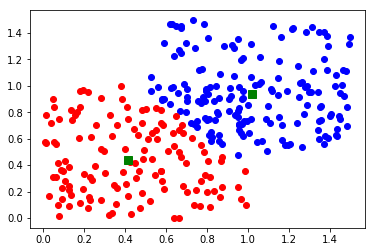

In [20]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# data generation
data = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,2)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [33]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


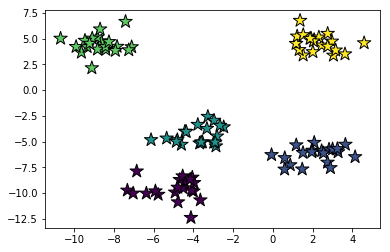

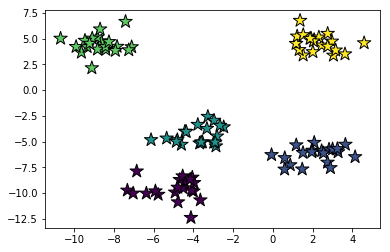

In [98]:
Y1

array([3, 3, 0, 2, 0, 1, 4, 4, 3, 2, 3, 4, 0, 3, 4, 0, 1, 4, 2, 1, 4, 2,
       1, 4, 3, 3, 4, 0, 2, 2, 0, 4, 2, 2, 1, 1, 2, 3, 1, 2, 2, 0, 4, 0,
       0, 3, 4, 1, 3, 1, 2, 2, 0, 4, 4, 3, 0, 2, 4, 4, 3, 1, 3, 3, 1, 2,
       0, 4, 1, 0, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 1, 3, 0, 2, 4, 0, 1, 2,
       1, 4, 2, 1, 3, 4, 0, 0, 1, 4, 2, 3])

In [4]:
# n_samples=1000
# centers=[(-1,-1,2,5,7),(0,0,7,9,8),(-8,1,8,-2,0),(1,0,8,0,9),(1,5,0,0,7)]
# X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=5,cluster_std=1.0,
#                   random_state=0)
# X.shape
# #y
# #plt.scatter(X[:,1],X[:,3])

In [149]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00050025 -0.04975877  0.30386756  0.17303724 -0.01979328]
 [-0.04975877  1.00050025 -0.51753596  0.29987866  0.13946607]
 [ 0.30386756 -0.51753596  1.00050025  0.0214513  -0.53474162]
 [ 0.17303724  0.29987866  0.0214513   1.00050025  0.57998988]
 [-0.01979328  0.13946607 -0.53474162  0.57998988  1.00050025]]


In [422]:
# A=np.random.normal(.5,.02,(20,6))
# sns.distplot